# Medium Article Recommendation

- `Text Preprocessing`
- `Text Contraction`
- `Lemmatization`
- `Bag of Words`
- `TF IDF`

In [5]:
import numpy as np
import pandas as  pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
raw_data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\NLP\NLP\Dataset\medium_articles_v3.csv')
raw_data.head()

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5


In [24]:
raw_data.describe(include = 'all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


- `Median reading time is 9 mins and Reading time of 75% of articles is 13 mins`
- `Four duplicates exists`
- `179 authors wrote 208 articles`

In [25]:
raw_data.isna().sum()

link            0
title           0
sub_title       0
author          0
reading_time    0
text            0
id              0
dtype: int64

# Exploratory Data Analysis

In [3]:
## Author
raw_data['author'].value_counts()

author
Adam Geitgey            5
Joseph Rocca            3
Natassha Selvaraj       3
Chris Zaire             2
Dario Radecic           2
                       ..
Matt Fogel              1
Maxime                  1
Tatev Karen             1
David Sumpter           1
Dr. Stephanie Estima    1
Name: count, Length: 179, dtype: int64

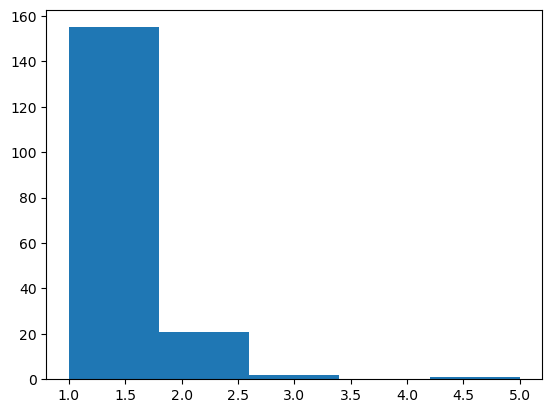

In [8]:
plt.hist(raw_data['author'].value_counts(), bins = 5);

`Authors write single article are more`

<BarContainer object of 35 artists>

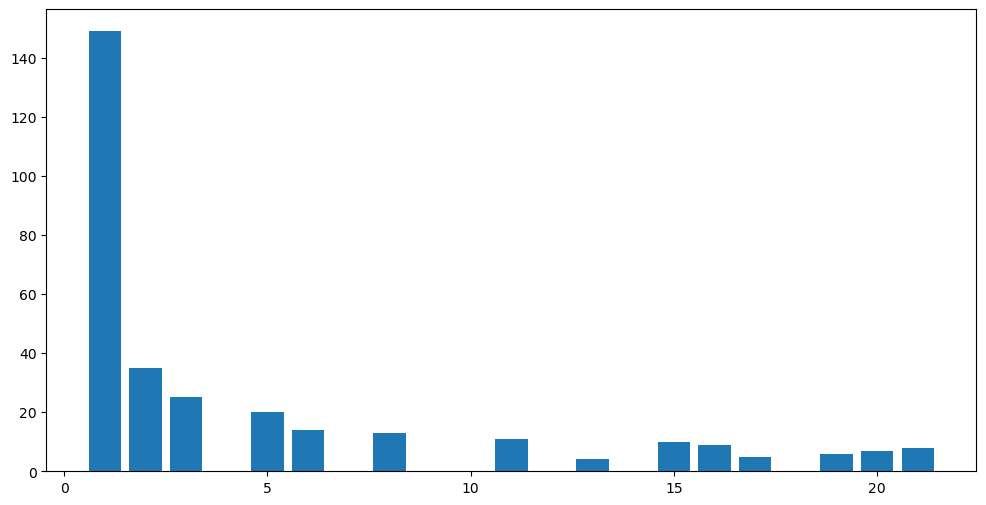

In [14]:
## Reading time
#raw_data['reading_time'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(raw_data['reading_time'].value_counts(), height = list(raw_data['reading_time'].value_counts().index))

Text(0.5, 1.0, 'Relationship between No. of words and Reading time')

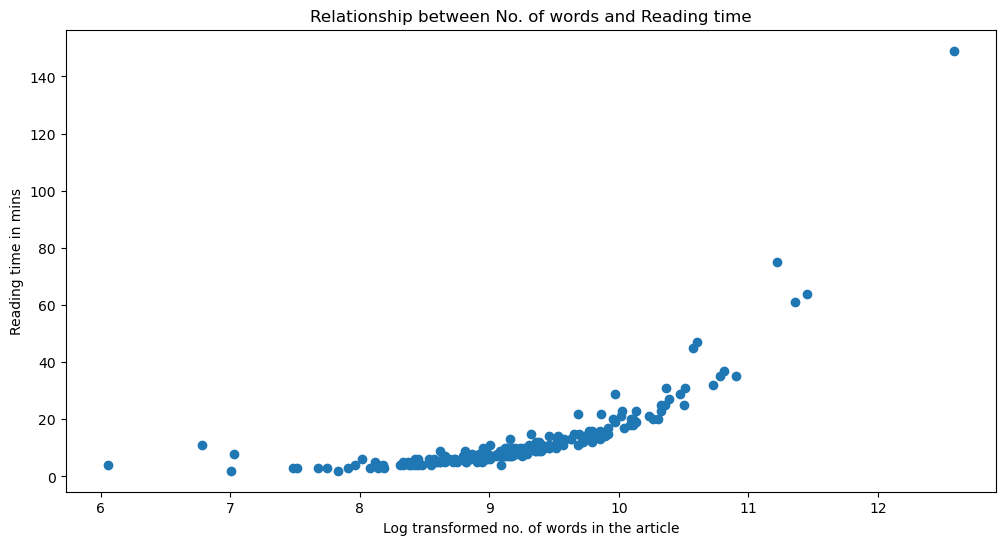

In [19]:
plt.scatter(np.log(raw_data['text'].apply(len)), raw_data['reading_time'])
plt.xlabel('No. of words in the article - Log transformed ')
plt.ylabel('Reading time in mins')
plt.title('Relationship between No. of words and Reading time')

`No of words and Reading time are linearly related and highly correlated`

In [21]:
print('Correlation Coeff: ', raw_data['reading_time'].corr(raw_data['text'].apply(len)))

Correlation Coeff:  0.9570411346175187


# Text Preprocessing

- `Apply contractions`
- `Stop Word Removal`
- `Remove punctuations`
- `Word Tokenization`
- `Stemming/Lemmatizing`
- `Case specific Pre Processing`

In [31]:
import contractions

In [44]:
text = '''I'll be there within 5 min. Shouldn't you be there too? 
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.'''
sw = stopwords.words('english')

In [76]:
def PreProcessing(text):    
    tokens = word_tokenize(expand_contractions(text))
    word_list = []
    lemma = WordNetLemmatizer()
    for word in tokens:
        if word not in sw and word not in string.punctuation:
            word_list.append(lemma.lemmatize(word, 'v'))
    return word_list

In [42]:
def expand_contractions(text):
    word_list = []
    for word in text.split():
        word_list.append(contractions.fix(word).lower())
    return ' '.join(word_list)

In [77]:
#tokens = PreProcessing(text)
data = raw_data.copy()
data['text_list'] = data['text'].apply(PreProcessing)

In [97]:
data['text_processed'] = data['text_list'].apply(lambda x: ' '.join(x))

In [98]:
data.head()

,link,title,sub_title,author,reading_time,text,id,text_list,text_processed
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1,"[post, co-written, baptiste, rocca, ``, unity,...",post co-written baptiste rocca `` unity streng...
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2,"[machine, learn, performance, measurement, ess...",machine learn performance measurement essentia...
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3,"[microsoft, 's, common, object, context, datas...",microsoft 's common object context dataset coc...
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4,"[statistics, machine, learn, number, attribute...",statistics machine learn number attribute feat...
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5,"[attention, need, say, robust, convolution, ha...",attention need say robust convolution hack squ...


In [83]:
voc_list = list(set(data[['id', 'text_list']].explode('text_list')['text_list']))

# Bag Of Words

In [88]:
bog = []
for item in data['text_list']:
    d = dict([(v, 0) for v in voc_list])
    for word in item:
        d['word'] += 1
    bog.append(d)

In [93]:
bog_df = pd.DataFrame(bog, index = data['id'])
bog_df.head()

,parisnicolas,follet,ghostweather,willingness,cold,sentimentality,csu,expiration,zuken,engineernithum,...,akash,constipation,quebec-based,3500,0.33,dudfield,raji,gower,hard,matrices
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
cv = CountVectorizer()

In [101]:
bog_vec = cv.fit_transform(data['text_processed'])

In [107]:
bog_vec.toarray().shape

(208, 27685)

In [104]:
cv.vocabulary_

{'post': 19270,
 'co': 5116,
 'written': 27339,
 'baptiste': 2841,
 'rocca': 21084,
 'unity': 25546,
 'strength': 23360,
 'old': 17799,
 'say': 21551,
 'express': 9380,
 'pretty': 19479,
 'well': 26965,
 'underlie': 25432,
 'idea': 12279,
 'rule': 21259,
 'powerful': 19328,
 'ensemble': 8854,
 'methods': 16110,
 'machine': 15145,
 'learn': 14412,
 'roughly': 21189,
 'often': 17764,
 'trust': 25119,
 'top': 24820,
 'rank': 20129,
 'many': 15503,
 'competitions': 5449,
 'include': 12540,
 'kaggle': 13643,
 'base': 2908,
 'hypothesis': 12217,
 'combine': 5344,
 'multiple': 16878,
 'model': 16574,
 'together': 24765,
 'produce': 19596,
 'much': 16846,
 'purpose': 19850,
 'introduce': 13106,
 'various': 26339,
 'notions': 17510,
 'give': 10861,
 'reader': 20212,
 'necessary': 17139,
 'key': 13828,
 'understand': 25448,
 'use': 26185,
 'relate': 20479,
 'able': 1065,
 'design': 6924,
 'adapt': 1221,
 'solutions': 22754,
 'need': 17147,
 'discuss': 7321,
 'know': 13955,
 'boostrapping': 3612,

# TF-IDF